In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import yfinance as yf
import pandas as pd
import datetime
from google.colab import files

import os

In [3]:
def download_yahoo_data(ticker, start_date, end_date):
  "Download historical data from Yahoo Finance"
  data = yf.download(ticker, start=start_date, end=end_date)
  if data.empty:
        print(f"Warning: No data found for {ticker} from {start_date} to {end_date}.")
  return data

# define the date ranges for data download
start_date_gspc_ixic = "1971-01-01"
end_date_gspc_ixic = "2016-12-31"
start_date_crude_treasury = "2006-01-01"
end_date_crude_treasury = "2016-12-31"

In [5]:
# Download GSPC (S&P 500) data
print("Downloading GSPC data...")
gspc_data = download_yahoo_data("^GSPC", start_date_gspc_ixic, end_date_gspc_ixic)
gspc_data.to_csv("GSPC_data.csv")
files.download("GSPC_data.csv")

# Download crude oil data from Investing.com
print("Downloading crude oil data...")
crude_oil_data = download_yahoo_data("CL=F", start_date_crude_treasury, end_date_crude_treasury)
crude_oil_data.to_csv("Crude_Oil_Data.csv")
files.download("Crude_Oil_Data.csv")

# Download Treasury bond data from Investing.com
print("Downloading Treasury bond data...")
treasury_data = download_yahoo_data("^TNX", start_date_crude_treasury, end_date_crude_treasury)
treasury_data.to_csv("Treasury_Bond_Data.csv")
files.download("Treasury_Bond_Data.csv")

#print("Data download complete. Files saved to computer.")

[*********************100%***********************]  1 of 1 completed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download IXIC (NASDAQ Composite) data
print("Downloading IXIC data...")
ixic_data = download_yahoo_data("^IXIC", start_date_gspc_ixic, end_date_gspc_ixic)
ixic_data.to_csv("IXIC_data.csv")
files.download("IXIC_data.csv")

[*********************100%***********************]  1 of 1 completed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Check file paths before parsing
gspc_data = pd.read_csv('/content/drive/MyDrive/projects/FinancialRiskMC/GSPC_data.csv')
ixic_data = pd.read_csv('/content/drive/MyDrive/projects/FinancialRiskMC/IXIC_data.csv')
crude_oil_data = pd.read_csv('/content/drive/MyDrive/projects/FinancialRiskMC/Crude_Oil_Data.csv')
treasury_data = pd.read_csv('/content/drive/MyDrive/projects/FinancialRiskMC/Treasury_Bond_Data.csv')

Writing a function to inspect the column names and the first few roads of a csv file

In [7]:
def inspect_csv(file_path):
  try:
    # Read the CSV file
    df = pd.read_csv(file_path)
    # Display the column names and first few rows
    print("Column Names:", df.columns.tolist())
    print("First few rows:")
    print(df.head())
  except Exception as e:
    print(f"Error inspecting {file_path}: {e}")

# Define file paths
base_path = "/content/drive/MyDrive/projects/FinancialRiskMC/"
gspc_path = base_path + "GSPC_data.csv"
ixic_path = base_path + "IXIC_data.csv"
crude_oil_path = base_path + "Crude_Oil_Data.csv"
treasury_path = base_path + "Treasury_Bond_Data.csv"

# Inspect each file
inspect_csv(gspc_path)
inspect_csv(ixic_path)
inspect_csv(crude_oil_path)
inspect_csv(treasury_path)

Column Names: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']
First few rows:
        Price              Close               High                Low   Open  \
0      Ticker              ^GSPC              ^GSPC              ^GSPC  ^GSPC   
1        Date                NaN                NaN                NaN    NaN   
2  1971-01-04   91.1500015258789  92.19000244140625  90.63999938964844    0.0   
3  1971-01-05  91.80000305175781  92.27999877929688  90.69000244140625    0.0   
4  1971-01-06   92.3499984741211               93.0               91.5    0.0   

     Volume  
0     ^GSPC  
1       NaN  
2  10010000  
3  12600000  
4  16960000  
Column Names: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']
First few rows:
        Price               Close                High                 Low  \
0      Ticker               ^IXIC               ^IXIC               ^IXIC   
1        Date                 NaN                 NaN                 NaN   
2  1971-02-05               100.0 

Now that we have gathered the data, let's go ahead and ream the files into DataFrames in Pandas.

We are interested only in information about the time and the corresponding returns of a factor or an instrument: as a consequence, we will project away many columns of our RAW data, and keep only the information we are interested in.

The following step, seperates the Date and the coresponding Close values of each stock and gathers them in a list as (date, value).

In [10]:
def parse_csv_data(file_path):
  # parse the date-value pairse form the csv files
  try:
    df = pd.read_csv(file_path, skiprows=2) # skipping the first two rowes since they contain non-data values
    # Rename columns and clean up
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Remove rows where the date or Close price is missing
    df.dropna(subset=['Date', 'Close'], inplace=True)

    # Sort by Date
    df.sort_values('Date', inplace=True)

    # Return list of (Date, Close) pairs
    return list(zip(df['Date'], df["Close"]))

  except Exception as e:
      print(f"Error parsing {file_path}: {e}")
      return []

# Parse data
gspc_parsed = parse_csv_data("/content/drive/MyDrive/projects/FinancialRiskMC/GSPC_data.csv")
ixic_parsed = parse_csv_data("/content/drive/MyDrive/projects/FinancialRiskMC/IXIC_data.csv")
crude_oil_parsed = parse_csv_data("/content/drive/MyDrive/projects/FinancialRiskMC/Crude_Oil_Data.csv")
treasury_parsed = parse_csv_data("/content/drive/MyDrive/projects/FinancialRiskMC/Treasury_Bond_Data.csv")

# Filter Treasury Bond data to include only dates from 2008 onwards
treasury_parsed_2008 = [(date, value) for date, value in treasury_parsed if date >= datetime.datetime(2008, 1, 1)]

print("GSPC_data (first 5):", gspc_parsed[:2])
print("IXIC_data (first 5):", ixic_parsed[:2])
print("Crude_Oil_data (first 5):", crude_oil_parsed[:2])
print("Treasury_Bond_data (first 5):", treasury_parsed_2008[:2])

factors1 = [crude_oil_parsed, treasury_parsed_2008]
#factor1_files = map(lambda fn, factor1_files)
#print(factors1)

GSPC_data (first 5): [(Timestamp('1971-01-04 00:00:00'), 91.1500015258789), (Timestamp('1971-01-05 00:00:00'), 91.8000030517578)]
IXIC_data (first 5): [(Timestamp('1971-02-05 00:00:00'), 100.0), (Timestamp('1971-02-08 00:00:00'), 100.83999633789062)]
Crude_Oil_data (first 5): [(Timestamp('2006-01-03 00:00:00'), 63.13999938964844), (Timestamp('2006-01-04 00:00:00'), 63.41999816894531)]
Treasury_Bond_data (first 5): [(Timestamp('2008-01-02 00:00:00'), 3.901000022888184), (Timestamp('2008-01-03 00:00:00'), 3.901000022888184)]


Crude Oil Prices might range from 20 to 150 dollars per barrel.
Treasury Bond Yields might range from 1% to 5%.
Without normalization, the larger numerical range (e.g., crude oil prices) would dominate the plot, making it difficult to see trends in the smaller-scale dataset. Another reason why normalizong is important, is that when plotting multiple datasets, normalization ensures that both series are visually comparable, regardless of their original magnitude. It lets us focus on relative changes (percent changes) rather than absolute values.

Max Crude Oil Value: 145.2899932861328
Max Treasury Bond Value: 4.261000156402588


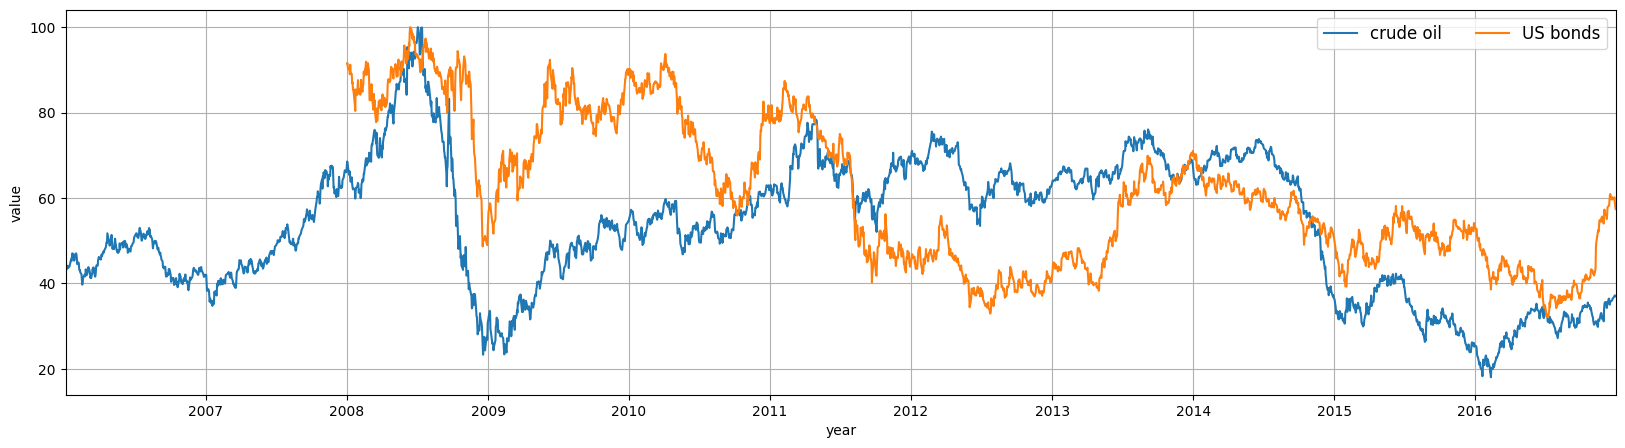

In [11]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(20,5))
max1 = np.max([x[1] for x in factors1[0]]) # crude oil
max2 = np.max([x[1] for x in factors1[1]]) # treasury bonds
print(f"Max Crude Oil Value: {max1}")
print(f"Max Treasury Bond Value: {max2}")

# normalizing the values by their maximums
plt.plot([x[0] for x in factors1[0]], [x[1]/max1*100 for x in factors1[0]], label="crude oil")
plt.plot([x[0] for x in factors1[1]], [x[1]/max2*100 for x in factors1[1]], label="US bonds")
plt.ylabel("value")
plt.xlabel("year")
plt.legend(ncol=2, loc='upper right', frameon=True, fontsize=12)
plt.xlim((factors1[0][0][0], factors1[0][-1][0]))
plt.grid(True)
plt.show()



Next, we are going to parse the data from the GSPS and IXIC stocks.

[(Timestamp('1971-01-04 00:00:00'), 91.1500015258789), (Timestamp('1971-01-05 00:00:00'), 91.8000030517578), (Timestamp('1971-01-06 00:00:00'), 92.3499984741211), (Timestamp('1971-01-07 00:00:00'), 92.37999725341795), (Timestamp('1971-01-08 00:00:00'), 92.19000244140624)]


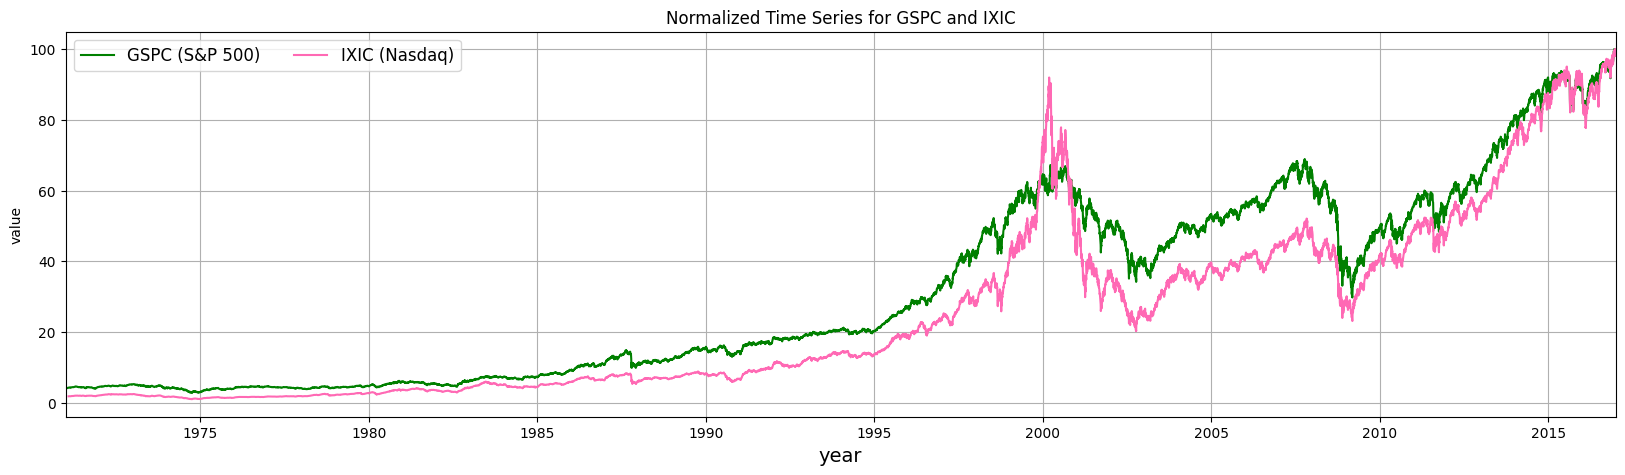

In [12]:
factors2 = [gspc_parsed, ixic_parsed]
print(factors2[0][:5])

plt.figure(figsize=(20,5))

max3 = np.max([x[1] for x in factors2[0]]) # GSPC
max4 = np.max([x[1] for x in factors2[1]]) # IXIC

plt.plot([x[0] for x in factors2[0]], [x[1] / max3 * 100 for x in factors2[0]], label="GSPC (S&P 500)", color = 'green')
plt.plot([x[0] for x in factors2[1]], [x[1] / max4 * 100 for x in factors2[1]], label="IXIC (Nasdaq)", color = '#FF69B4')
plt.ylabel("value")
plt.xlabel("year", fontsize=14)
plt.legend(ncol=2, loc='upper left', frameon=True, fontsize=12)
plt.title('Normalized Time Series for GSPC and IXIC')
plt.xlim((factors2[0][0][0], factors2[0][-1][0]))
plt.grid(True)
plt.show()

The above plot shows the two stock GSPC and IXIC. Evidently from the plot we can see that these have very similar trends, even with the same high and lows. In this analysis, we will calculate the correlation matrix and we will see how these two stocks are highly correlated.

In this analysis, we are considering to invest in the first 35 stocks out of the total 100 stocks present in our datasets. Out of these 35 stocks, we want to prepare the data for the stocks which have historical information for more than 5 years. This means that all instruments with less than 5 years of history should be removed.

In [15]:
import time
from datetime import datetime

# Scrape S&P 500 tickers from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url)[0]

# extract the fisrt 100 companies
top_100_tickers = sp500_table['Symbol'].head(100).tolist()
#print(f"Top 100 Tickers: {top_100_tickers}")

Now we download the historical data for these tickers in our list (from Yahoo Finance)

In [16]:
import datetime

save_path = "/content/drive/MyDrive/projects/FinancialRiskMC"
os.makedirs(save_path, exist_ok=True)

# Define the start date
start_date = "1997-01-01"
end_date = datetime.datetime.today().strftime("%Y-%m-%d")

# Create a dictionary to store data
historical_data = {}

# Download data for each ticker
for ticker in top_100_tickers:
  try:
    print(f"Fetching data for {ticker} ...")
    stock_data = yf.download(ticker, start = start_date, end = end_date)
    historical_data[ticker] = stock_data
  except Exception as e:
    print(f"failed to fetch data for {ticker}: {e}")

# Example: View historical data for a specific stock
print(historical_data['AAPL'].head())

# Save each stock's data to a CSV file
for ticker, data in historical_data.items():
  file_name = f"{save_path}/{ticker}_historical_data.csv"
  data.to_csv(file_name)
  print(f"Saved {ticker} data to {file_name}")

Fetching data for MMM ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AOS ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ABT ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ABBV ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ACN ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADBE ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMD ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AES ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AFL ...


[*********************100%***********************]  1 of 1 completed


Fetching data for A ...


[*********************100%***********************]  1 of 1 completed


Fetching data for APD ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for ABNB ...
Fetching data for AKAM ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ALB ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ARE ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ALGN ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ALLE ...


[*********************100%***********************]  1 of 1 completed


Fetching data for LNT ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ALL ...


[*********************100%***********************]  1 of 1 completed


Fetching data for GOOGL ...


[*********************100%***********************]  1 of 1 completed


Fetching data for GOOG ...


[*********************100%***********************]  1 of 1 completed


Fetching data for MO ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMZN ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMCR ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AEE ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AEP ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AXP ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AIG ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMT ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AWK ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMP ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AME ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMGN ...


[*********************100%***********************]  1 of 1 completed


Fetching data for APH ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADI ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ANSS ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AON ...


[*********************100%***********************]  1 of 1 completed


Fetching data for APA ...


[*********************100%***********************]  1 of 1 completed


Fetching data for APO ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AAPL ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AMAT ...


[*********************100%***********************]  1 of 1 completed


Fetching data for APTV ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ACGL ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADM ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for ANET ...
Fetching data for AJG ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AIZ ...


[*********************100%***********************]  1 of 1 completed


Fetching data for T ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ATO ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADSK ...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADP ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AZO ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AVB ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AVY ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AXON ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BKR ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BALL ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BAC ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BAX ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BDX ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BRK.B ...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Fetching data for BBY ...


[*********************100%***********************]  1 of 1 completed


Fetching data for TECH ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BIIB ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BLK ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BX ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BK ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BA ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BKNG ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BWA ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BSX ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BMY ...


[*********************100%***********************]  1 of 1 completed


Fetching data for AVGO ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BR ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BRO ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1997-01-01 -> 2025-02-05)')


Fetching data for BF.B ...
Fetching data for BLDR ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BG ...


[*********************100%***********************]  1 of 1 completed


Fetching data for BXP ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CHRW ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CDNS ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for CZR ...
Fetching data for CPT ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CPB ...


[*********************100%***********************]  1 of 1 completed


Fetching data for COF ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CAH ...


[*********************100%***********************]  1 of 1 completed


Fetching data for KMX ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CCL ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for CARR ...
Fetching data for CAT ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CBOE ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CBRE ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for CDW ...


Fetching data for CE ...


[*********************100%***********************]  1 of 1 completed


Fetching data for COR ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CNC ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CNP ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CF ...


[*********************100%***********************]  1 of 1 completed


Fetching data for CRL ...


[*********************100%***********************]  1 of 1 completed


Fetching data for SCHW ...


[*********************100%***********************]  1 of 1 completed


Price          Close      High       Low      Open      Volume
Ticker          AAPL      AAPL      AAPL      AAPL        AAPL
Date                                                          
1997-01-02  0.158165  0.160048  0.156282  0.159106   143113600
1997-01-03  0.163813  0.167580  0.158165  0.159106   119716800
1997-01-06  0.134628  0.138159  0.129921  0.132746  1882832000
1997-01-07  0.131804  0.137453  0.131804  0.136511   976931200
1997-01-08  0.132746  0.138395  0.130863  0.137453  1100131200
Saved MMM data to /content/drive/MyDrive/projects/FinancialRiskMC/MMM_historical_data.csv
Saved AOS data to /content/drive/MyDrive/projects/FinancialRiskMC/AOS_historical_data.csv
Saved ABT data to /content/drive/MyDrive/projects/FinancialRiskMC/ABT_historical_data.csv
Saved ABBV data to /content/drive/MyDrive/projects/FinancialRiskMC/ABBV_historical_data.csv
Saved ACN data to /content/drive/MyDrive/projects/FinancialRiskMC/ACN_historical_data.csv
Saved ADBE data to /content/drive/MyDrive/pr